In [3]:
%matplotlib inline
%qtconsole

import os
import cPickle
import numpy as np
import pandas as pd
from scipy import linalg

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.figure import Figure
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.basemap import Basemap

from netCDF4 import Dataset, date2num, num2date
from datetime import datetime, timedelta
from scipy import stats
import numpy as np
import os.path
import string

import t_subsample
from getSkillGridded import getSkillGridded
from load_gridded_data import read_gridded_data_CMIP5_model
from gridAvg import gridAvg



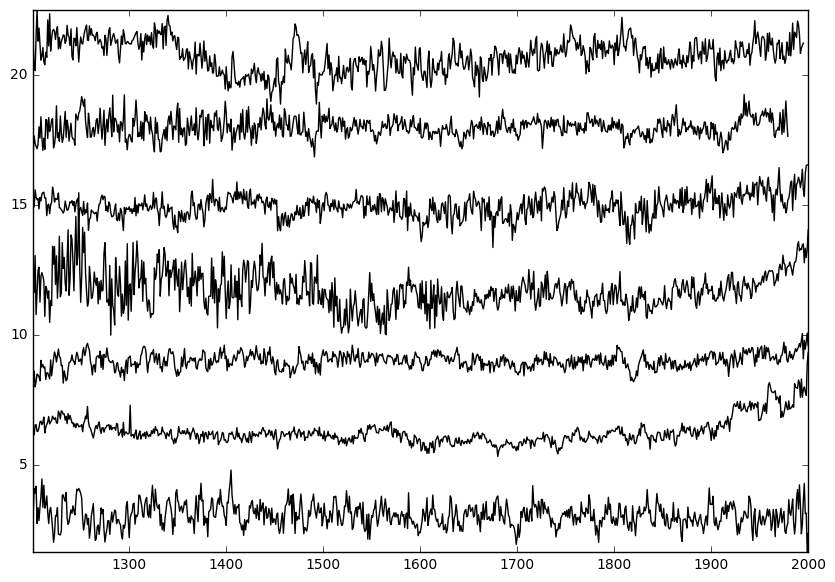

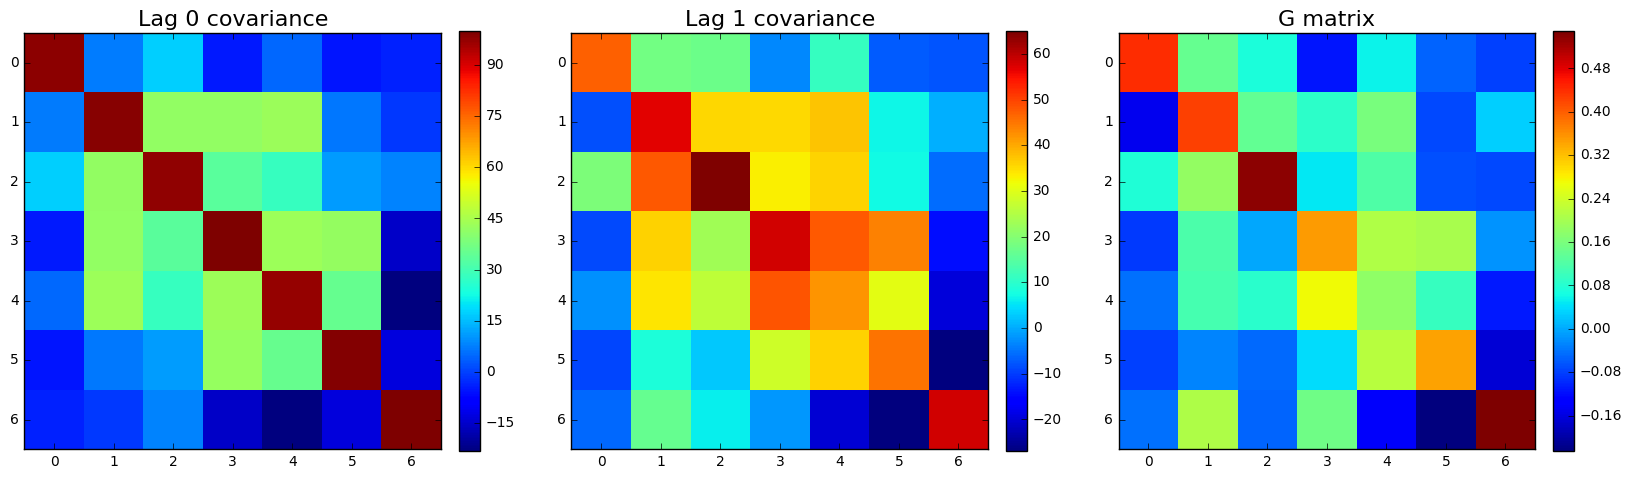

   Antarctica (SD)  Arctic (SD)  Asia (SD)  Australasia (SD)  Europe (SD)  \
1         0.210679     0.370853   0.150658          0.146958     0.135684   

   N America trees (SD)  South America (SD)  
1              0.325194            0.241574  
   Antarctica (SD)  Arctic (SD)  Asia (SD)  Australasia (SD)  Europe (SD)  \
1         0.898749     0.653541   0.994142          1.015738     0.971471   

   N America trees (SD)  South America (SD)  
1              0.790805            0.887282  


In [36]:
filename = 'DatabaseS2-Regional-Temperature-Reconstructions.xlsx'
sheet = 'Composite - annual'
tmp = pd.read_excel(filename, sheet)

tmp = tmp.drop('N America pollen (SD)',1)
tmp.index = tmp['Mid-point CE']
tmp = tmp.drop('Mid-point CE',1)

# 1200:1600, 1600:1900 shows some skill
# Skill in the Arctic is generally higher.. why? Greater lag1 autocovariance?

# Plot the records selected 
plt.figure(figsize=(10,7))
lpn,mpn=tmp.shape
# spacing between time series
spc = 3;
pns = tmp+np.outer(np.ones(lpn)*spc,np.arange(1,mpn+1));
plt.plot(pns.iloc[1200:,:7],color='k');
plt.autoscale(enable=True, axis='both', tight=True)

corrdf,rmsedf,G,c0,ct = getSkillGridded(tmp,1,[1800,1900],[1900,1950],False,6);
print(corrdf)
print(rmsedf)



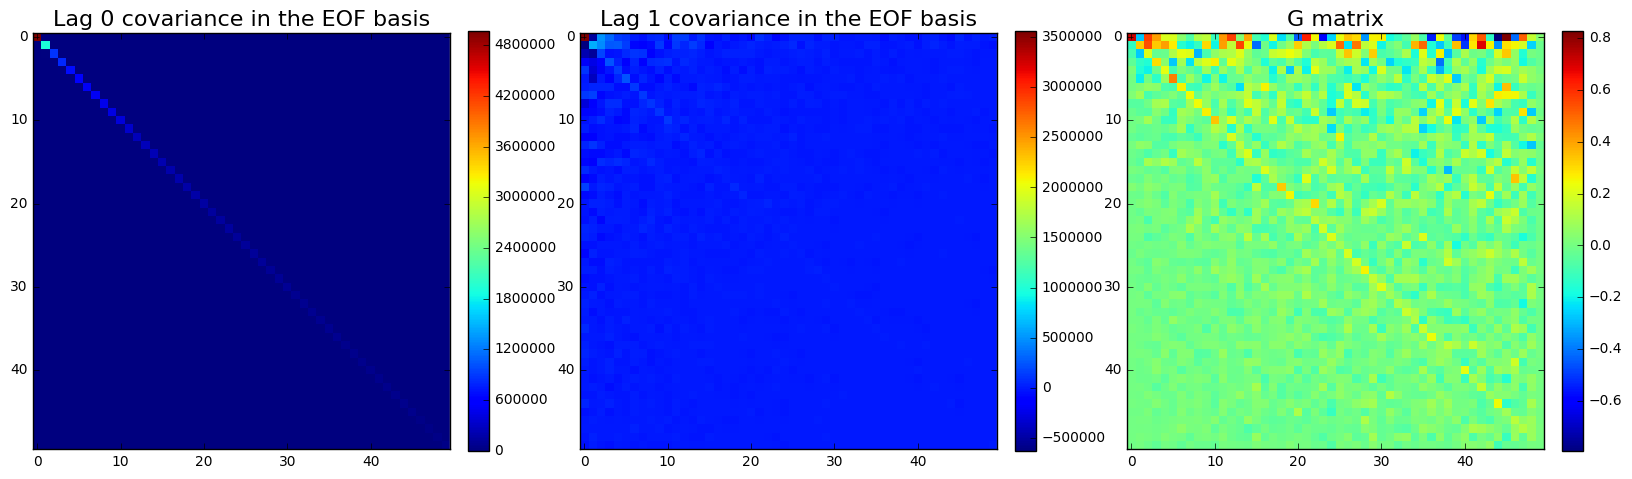

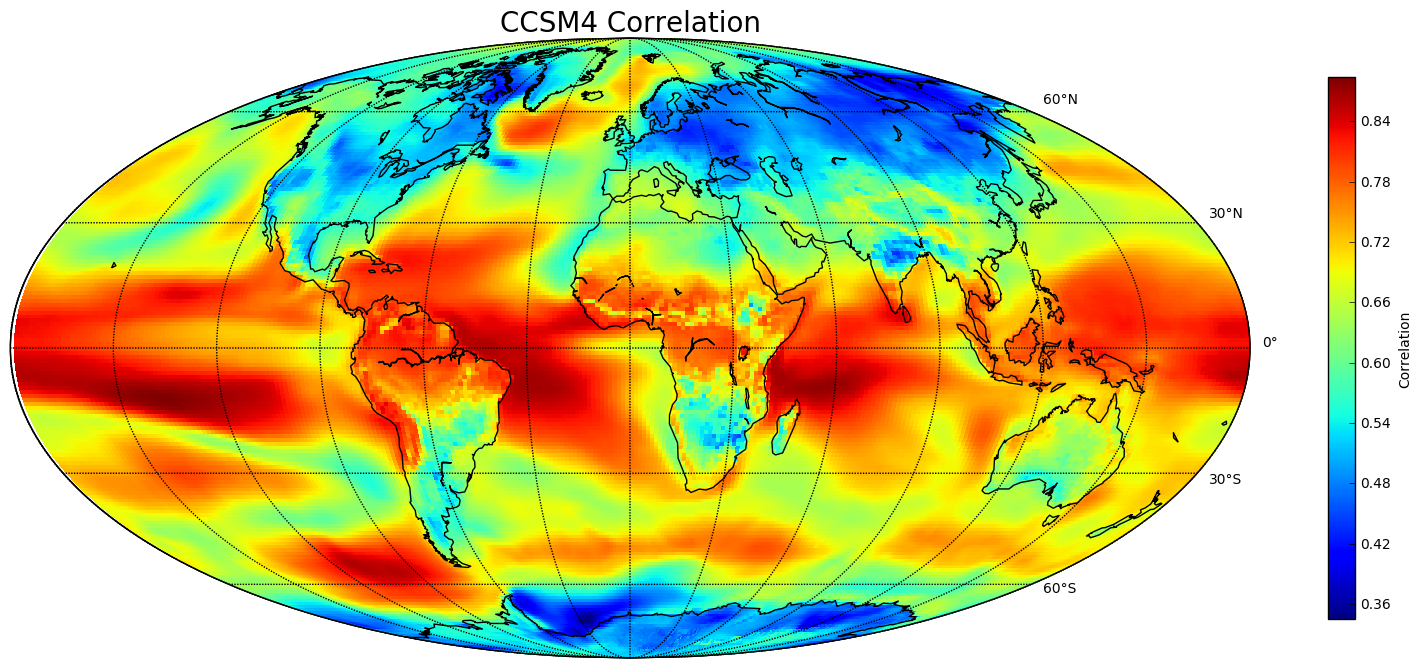

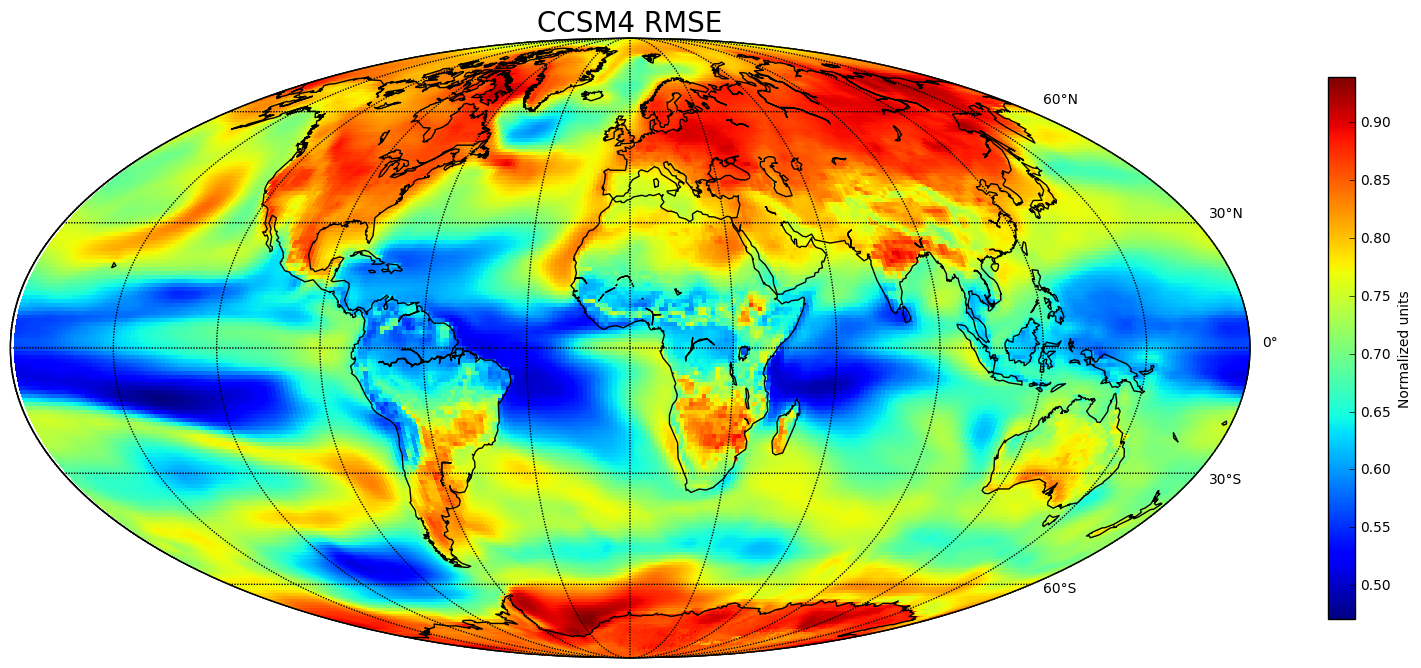

In [110]:
# Make a LIM from the leading 8 EOFs. Does it make sense? Does it improve prediction?

time = np.arange(850,1851)
data = np.reshape(dd['tas_sfc_Amon']['value'],[1001,-1])
ccsm4DF = pandas.DataFrame(data=data,index=time)

corrdf,rmsedf,G,c0,ct = getSkillGridded(ccsm4DF,1,[1100,1450],[1100,1450],True,50);

rmap = corrdf.values.reshape(192,288)
lon_g = dd['tas_sfc_Amon']['lon']
lat_g = dd['tas_sfc_Amon']['lat']

# Mask and plot with basemap

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = np.meshgrid(lon_g[:], lat_g[:])

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',cmap=cmap,latlon=True);
#im2 = m.pcolormesh(x,y,masked_array,shading='flat',cmap=cmap,latlon=True);
m.drawcoastlines();
cbar = plt.colorbar(shrink=.7)
plt.title('CCSM4 Correlation',size=20)
cbar.set_label('Correlation')


rmap = rmsedf.values.reshape(192,288)
lon_g = dd['tas_sfc_Amon']['lon']
lat_g = dd['tas_sfc_Amon']['lat']

# Mask and plot with basemap

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = np.meshgrid(lon_g[:], lat_g[:])

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',cmap=cmap,latlon=True);
#im2 = m.pcolormesh(x,y,masked_array,shading='flat',cmap=cmap,latlon=True);
m.drawcoastlines();
cbar = plt.colorbar(shrink=.7)
plt.title('CCSM4 RMSE',size=20)
cbar.set_label('Normalized units')

In [4]:
# Make a LIM for a subset of the domain in space

time = np.arange(850,1851)
lonrange = slice(168,173) # Pacific
lonrange = slice(262,266) # Atlantic
latrange = slice(30,160)
datar = dd['tas_sfc_Amon']['value'][:,latrange,lonrange]

#datar = dd['tas_sfc_Amon']['value'][:,1:10,1:10]
_,llat,llon = datar.shape
data = np.reshape(datar,[1001,-1])
ccsm4DF = pandas.DataFrame(data=data,index=time)

corrdf,rmsedf,G,c0,ct = getSkillGridded(ccsm4DF,2,[1100,1950],[1100,1950],False);

rmap = corrdf.values.reshape(llat,llon)
lon_g = dd['tas_sfc_Amon']['lon'][lonrange]
lat_g = dd['tas_sfc_Amon']['lat'][latrange]

# Mask and plot with basemap

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = np.meshgrid(lon_g[:], lat_g[:])

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',cmap=cmap,latlon=True);
#im2 = m.pcolormesh(x,y,masked_array,shading='flat',cmap=cmap,latlon=True);
m.drawcoastlines();
cbar = plt.colorbar(shrink=.7)
plt.title('CCSM4 RMSE',size=20)
cbar.set_label('Correlation')


ValueError: Empty data passed with indices specified.

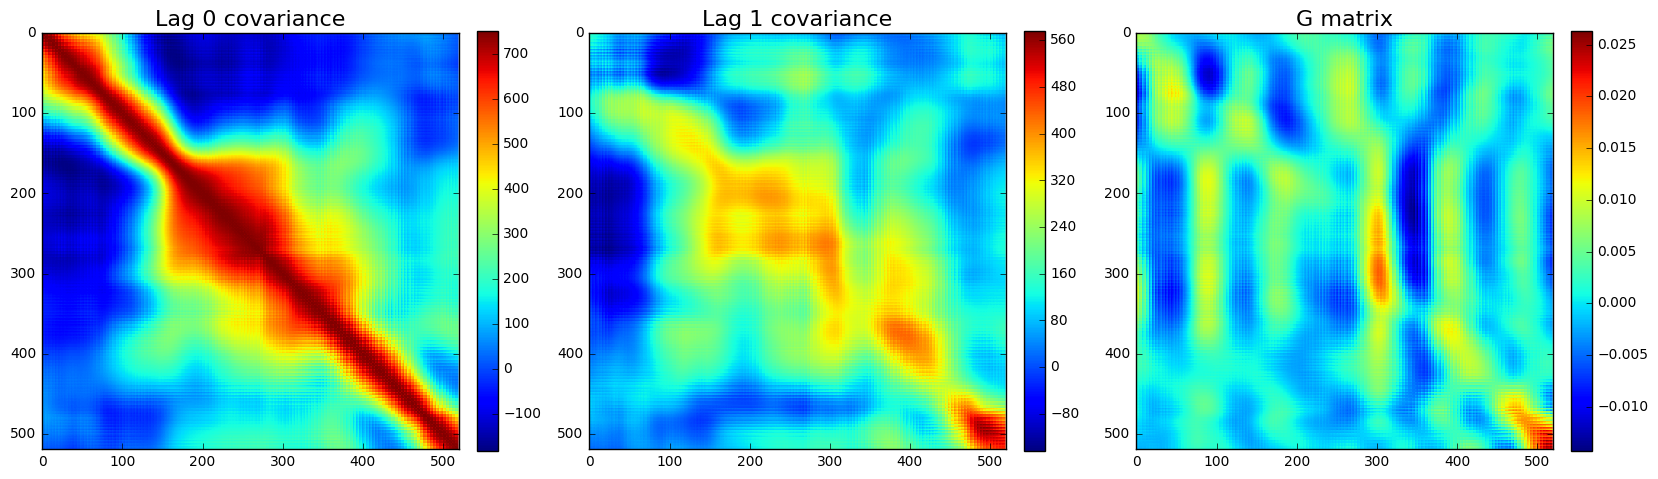

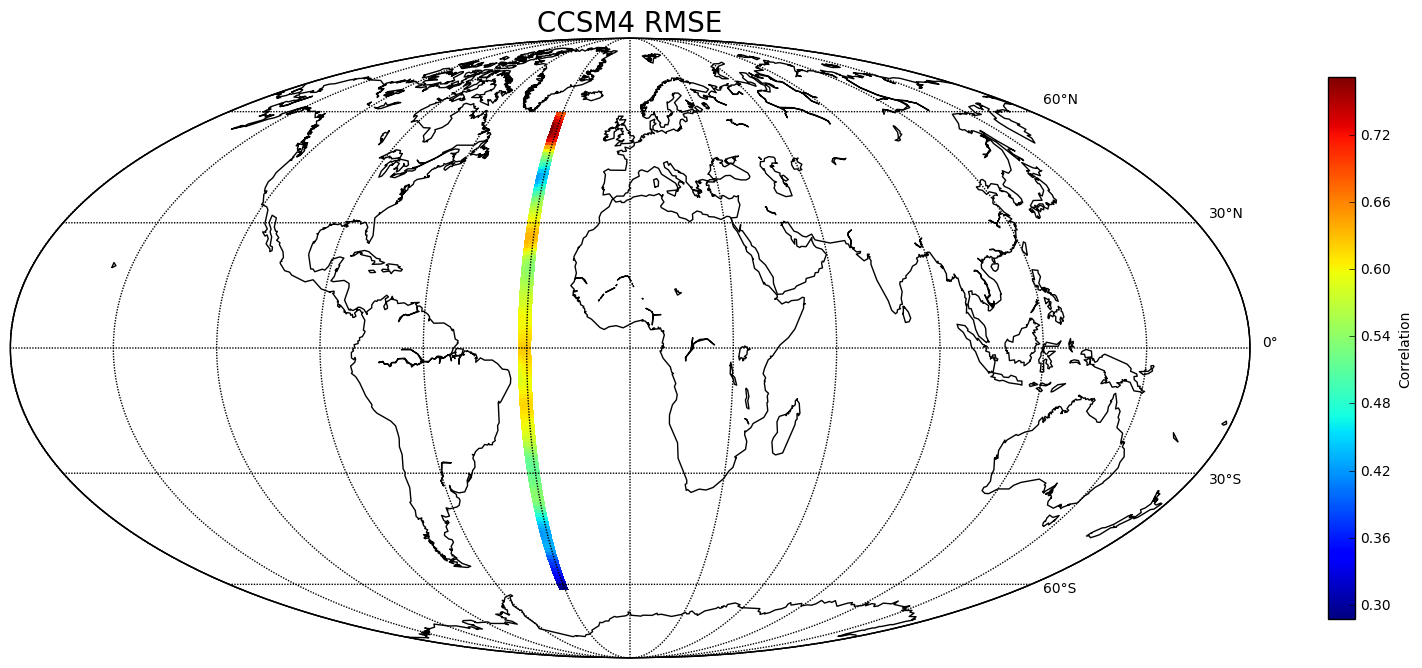

In [6]:
# Make a LIM for a subset of the domain in space
# Use EOFs

time = np.arange(850,1851)
#lonrange = slice(168,173) # Pacific
lonrange = slice(262,266) # Atlantic
latrange = slice(50,130)
latrange = slice(30,160)
datar = dd['tas_sfc_Amon']['value'][:,latrange,lonrange]

#datar = dd['tas_sfc_Amon']['value'][:,1:10,1:10]
_,llat,llon = datar.shape
data = np.reshape(datar,[1001,-1])
ccsm4DF = pandas.DataFrame(data=data,index=time)

corrdf,rmsedf,G,c0,ct = getSkillGridded(ccsm4DF,1,[1100,1950],[1100,1950],False,8);

rmap = corrdf.values.reshape(llat,llon)
lon_g = dd['tas_sfc_Amon']['lon'][lonrange]
lat_g = dd['tas_sfc_Amon']['lat'][latrange]

# Mask and plot with basemap

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = np.meshgrid(lon_g[:], lat_g[:])

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',cmap=cmap,latlon=True);
#im2 = m.pcolormesh(x,y,masked_array,shading='flat',cmap=cmap,latlon=True);
m.drawcoastlines();
cbar = plt.colorbar(shrink=.7)
plt.title('CCSM4 RMSE',size=20)
cbar.set_label('Correlation')
plt.show()

#plt.plot(np.sort(np.dot(G.transpose(),np.ones(400))))


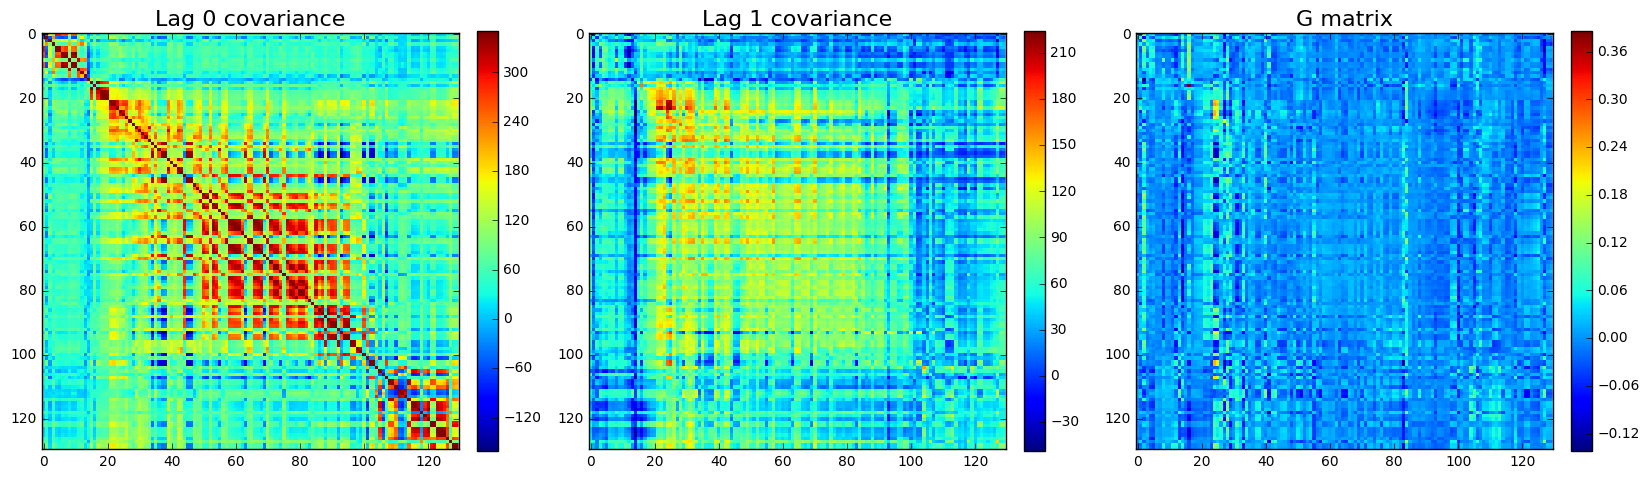

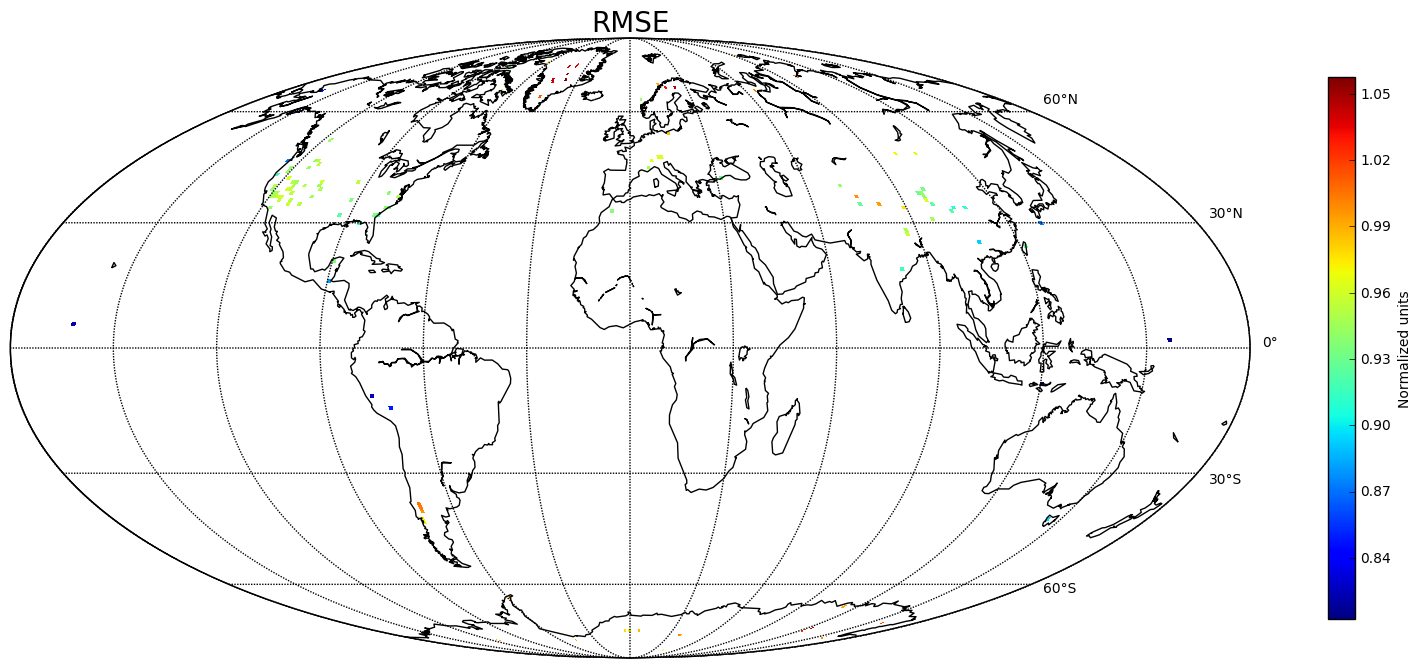

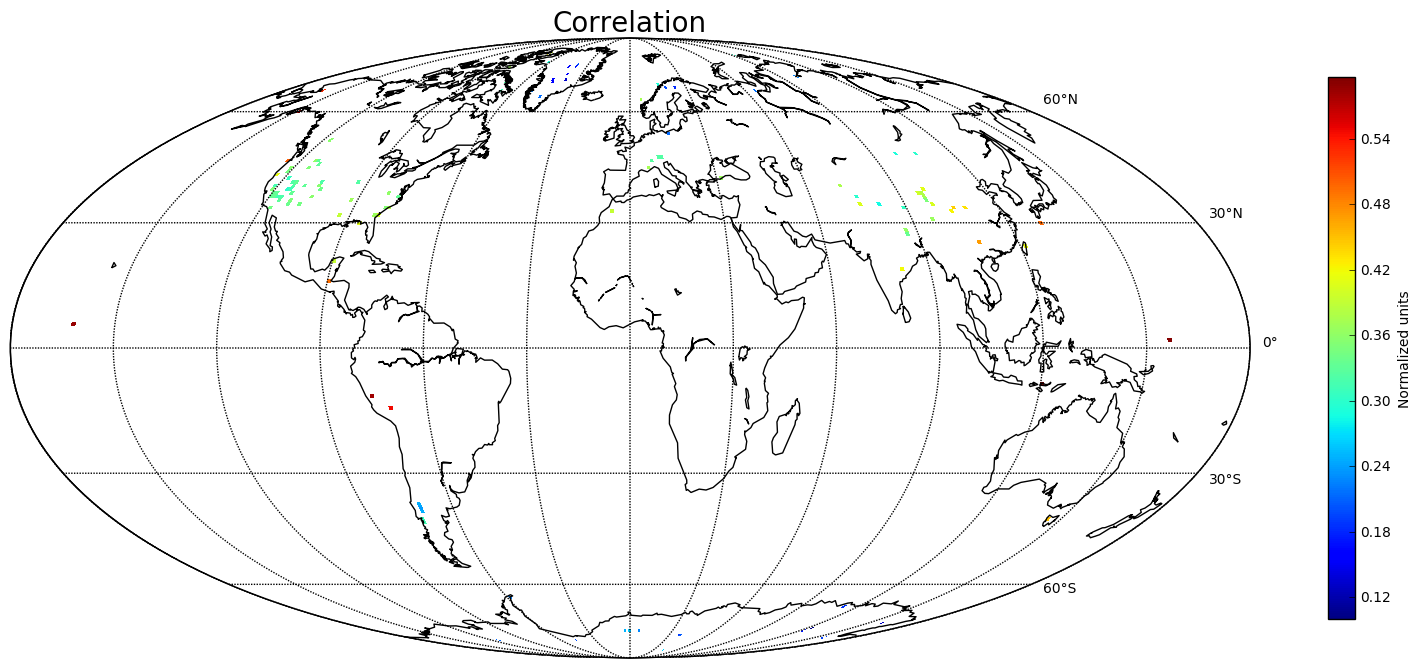

In [16]:
# Mask with data for a pseudoproxy-like experiment
mask = dmask

data = dd['tas_sfc_Amon']['value'][:,mask]
time = np.arange(850,1851)

ccsm4DF = pandas.DataFrame(data=data,index=time)
corrdf,rmsedf,G,c0,ct = getSkillGridded(ccsm4DF,1,[1100,1450],[1450,1800],False,50);
#rdf,G,c0,ct = getSkillGridded(ccsm4DF,1,[1100,1450],[1800,1850],True,8);

lon_g = dd['tas_sfc_Amon']['lon']
lat_g = dd['tas_sfc_Amon']['lat']

# Put RMSE on a spatial grid
m,n = mask.shape
rmap = np.empty([m,n])*np.nan
rmap[mask] = np.squeeze(rmsedf.values)

# Mask and plot with basemap

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = np.meshgrid(lon_g[:], lat_g[:])

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',cmap=cmap,latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',cmap=cmap,latlon=True);
m.drawcoastlines();
cbar = plt.colorbar(shrink=.7)
plt.title('RMSE',size=20)
cbar.set_label('Normalized units')

### correlation ###

# Put Corr on a spatial grid
m,n = mask.shape
rmap = np.empty([m,n])*np.nan
rmap[mask] = np.squeeze(corrdf.values)

# Mask and plot corr with basemap

plt.figure(figsize=(20,10))
m = Basemap(projection='moll',llcrnrlat=-87,urcrnrlat=81,lon_0=0,\
            llcrnrlon=0,urcrnrlon=360,resolution='c');
# draw parallels and meridians.
parallels = np.arange(-90.,90.,30.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,30.)
m.drawmeridians(meridians)
m.drawmapboundary(fill_color='white')

x,y = np.meshgrid(lon_g[:], lat_g[:])

ax = plt.gca()
masked_array = np.ma.array(rmap, mask=np.isnan(rmap))
cmap = matplotlib.cm.jet
cmap.set_bad('white',1.0)

im1 = m.pcolormesh(x,y,rmap,shading='flat',cmap=cmap,latlon=True);
im2 = m.pcolormesh(x,y,masked_array,shading='flat',cmap=cmap,latlon=True);
m.drawcoastlines();
cbar = plt.colorbar(shrink=.7)
plt.title('Correlation',size=20)
cbar.set_label('Normalized units')